In [5]:
import matplotlib.pyplot as plt

import mne


Evaluating the raw data contained in the data set 

Electrode names: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']
Sampling Frequency: 1024.0


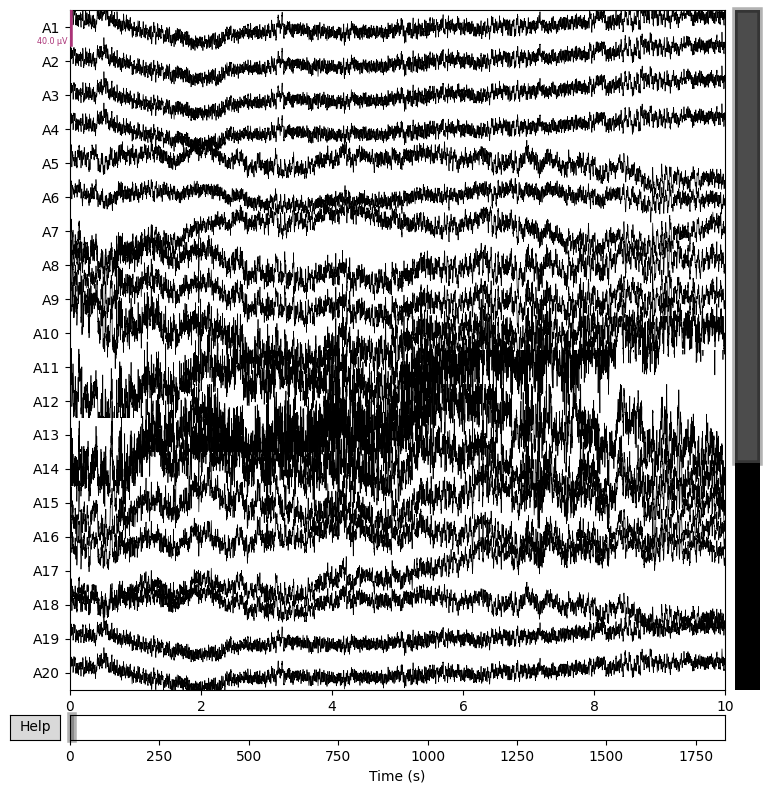

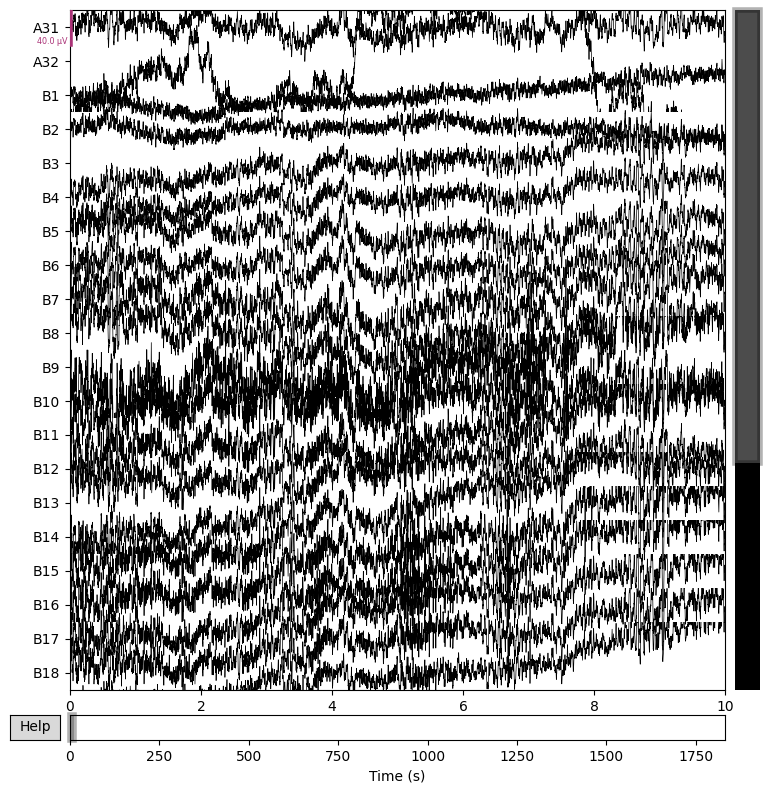

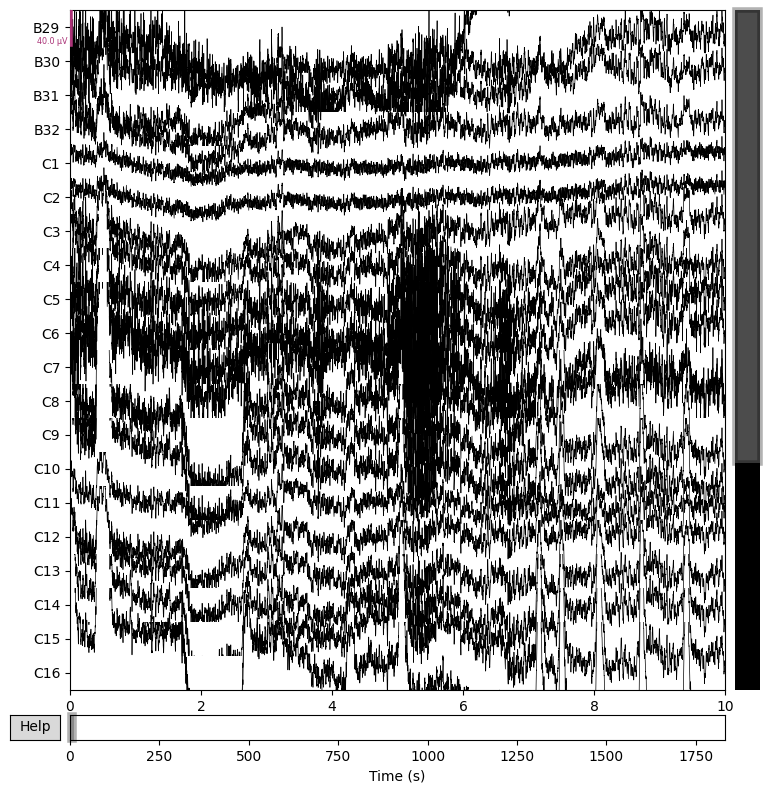

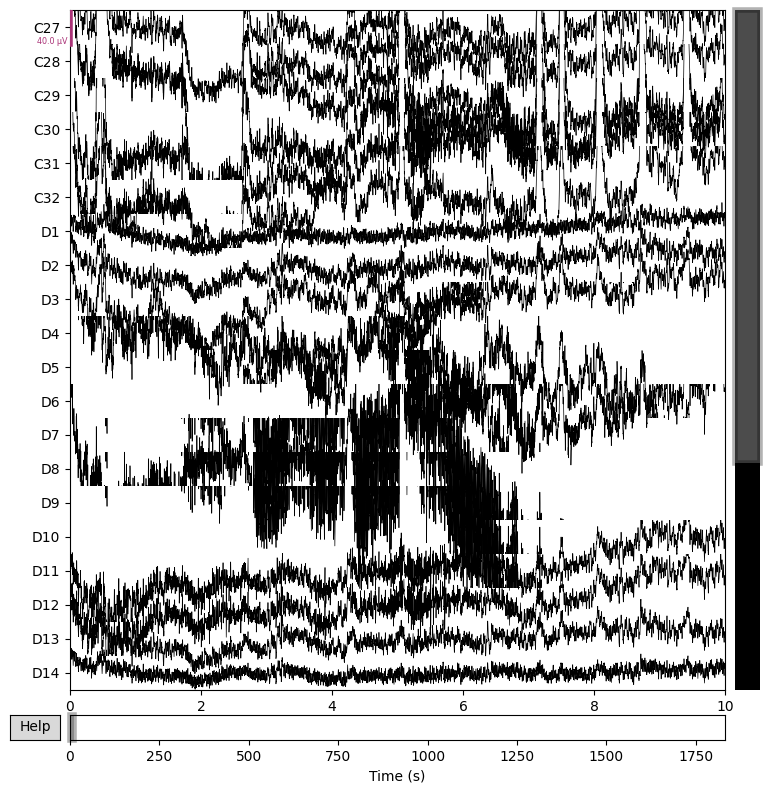

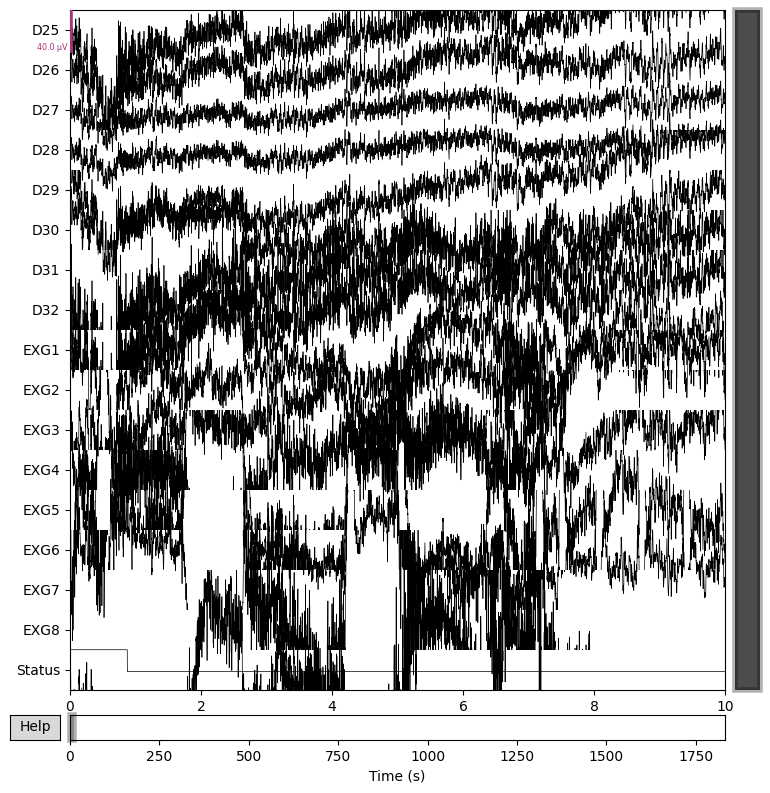

In [6]:

root = 'C:/Users/serpr/OneDrive - Universidade do Porto/Documentos/4ºano_2ºsemestre/robotica/projeto/inner-speech-recognition'
n_s = 1
n_b = 1

file_name = (
    f"{root}/sub-0{n_s}/ses-0{n_b}/eeg/sub-0{n_s}_ses-0{n_b}_task-innerspeech_eeg.bdf"      
)

raw_data = mne.io.read_raw_bdf(input_fname=file_name, preload=True, verbose='WARNING')

# Get electrode names
electrode_names = raw_data.ch_names

# Print electrode names
print("Electrode names:", electrode_names)
print("Sampling Frequency:", raw_data.info['sfreq'])

channels_per_page = 30
num_channels = len(electrode_names)

# Calculate the total number of pages needed
num_pages = num_channels // channels_per_page
if num_channels % channels_per_page != 0:
    num_pages += 1

# Loop through each page and plot
for page in range(num_pages):
    start_channel = page * channels_per_page
    end_channel = min(start_channel + channels_per_page, num_channels)
    
    # Create a subset of channel names for the current page
    channel_names_page = electrode_names[start_channel:end_channel]
    
    # Extract the corresponding data for the current channels
    picks_page = [raw_data.ch_names.index(name) for name in channel_names_page]
    raw_data_page = raw_data.copy().pick(picks_page)
    
    # Plot the current page
    raw_data_page.plot(show_scrollbars=True)
    plt.show()



From the 136 channels, 128 are EEG channels 

In [7]:
# Define the electrodes you want to include
non_selected_electrodes = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status']

# Remove non-selected electrodes from the list of all electrodes
selected_electrodes = [elec for elec in electrode_names if elec not in non_selected_electrodes]

# Check if the selected electrodes are available in the data
available_electrodes = [elec for elec in selected_electrodes if elec in electrode_names]

# warning
if len(available_electrodes) != len(selected_electrodes):
    print("Warning: Some selected electrodes are not available in the data.")

# Extract data only from the selected electrodes
raw_data_selected = raw_data.copy().pick_channels(available_electrodes)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Inner speech - main parts of the brain involved: 
 - *Broca's Area*: area located in the frontal part of the left hemisphere of the brain; contains neurons invoved in the speech function 
https://www.britannica.com/science/Broca-area
https://researchgate.net/publication/235916663_Self-Awareness_Part_2_Neuroanatomy_and_Importance_of_Inner_Speech

 - *Prefrontal cortex*: particularly dorsolateral prefrontal cortex, is involved in activities such as memory, attention and cognitive control. Inner speech involves self-directed thoughts and problem-solving, which is likely to engage the prefrontal cortex 
 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4692319/

- *Temporal cortex*: region associated with phonological and semantic language processingm, and its activation during inner speech suggests its involvement in the generation and processing of internal verbal material
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6871832/

- *Inferior frontal gyrus*: makes up the lateral and inferior surface of the frontal lobe and is separated from the middle frontal gyrus above by the infeior frontal sulcus
https://radiopaedia.org/articles/inferior-frontal-gyrus
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3462327/

 - *Cingulate Cortex*: It is involved in attentional processes and monitoring. During inner speech, this region may be involved in monitoring the content of internal dialogue and directing attention to certain thoughts or tasks.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4692319/

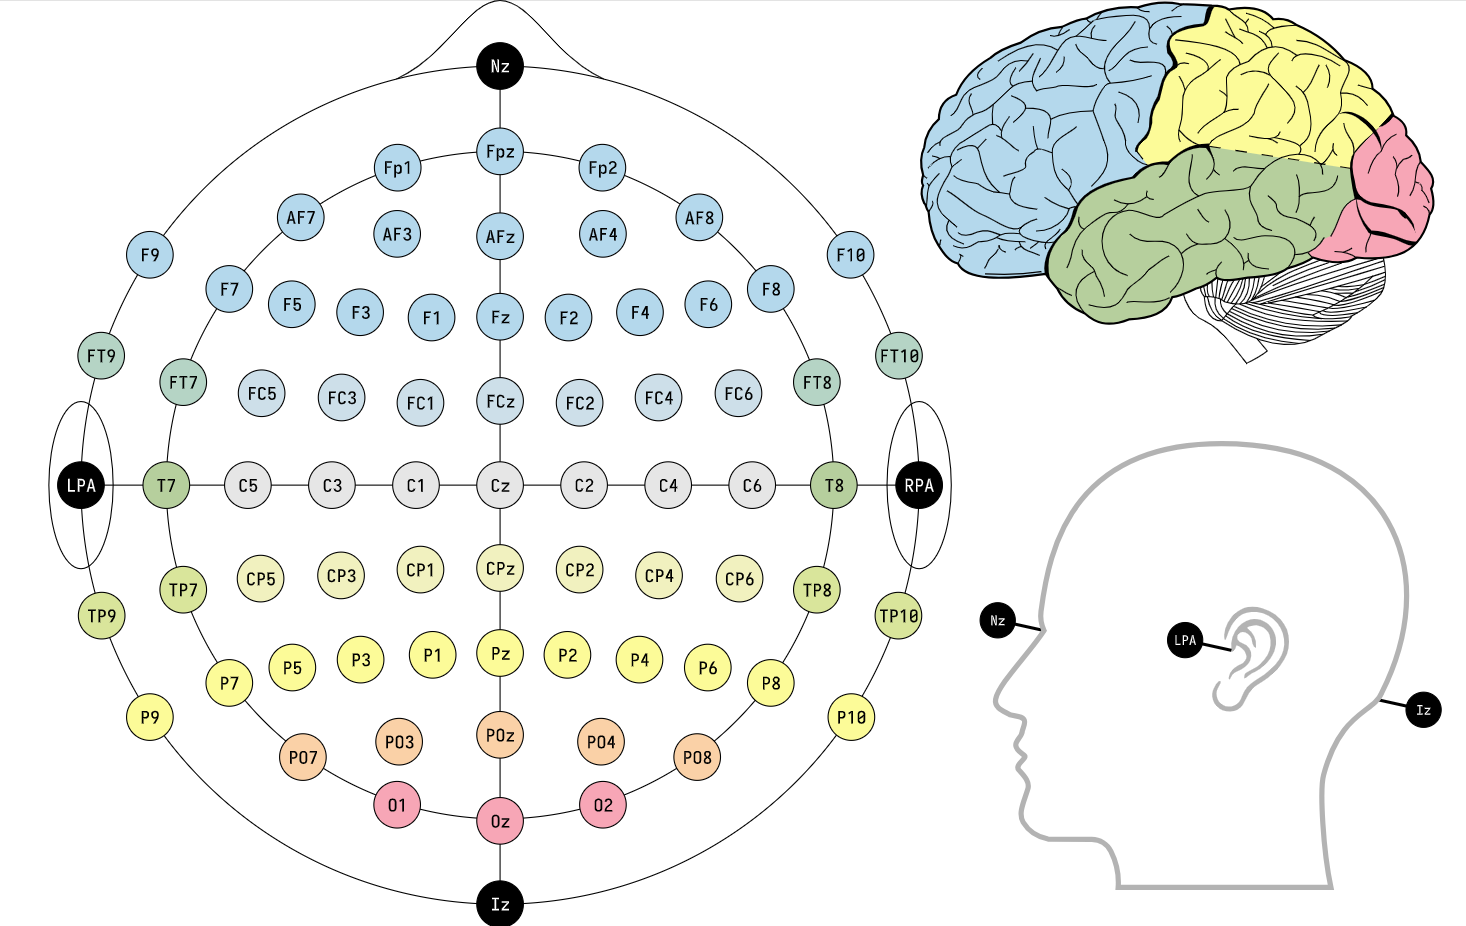

BioSemi nomenclature for a head cap with 128 channels - https://www.biosemi.com/pics/cap_128_layout_medium.jpg

The non selected eletrodes will be: 
 Oz, O1, O2, PO7, PO3, POZ, PO4, PO8, P9, P7, P5, P3, P1, PZ, P2, P4, P6, P8, P10 

 Oz => A23; Pz => A19

According to BioSemi nomenclature: 
D32, D30, D31, D29, A6, A7, A12, A11, A10, A9, A8, A13, A14, A15, A16, A17, A18, A25, A24, A22, A21, A20, A5, A32, A31, A30, A29, A28, A27, A26, B3, B4, B5, B6, B7, B8, B9, B13, B12, B11, B10


In [8]:
nselected_electrodes = ['D32', 'D30', 'D31', 'D29', 'A6', 'A7', 'A12', 'A11', 'A10', 'A9', 'A8', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A25', 'A24', 'A22', 'A21', 'A20', 'A5', 'A32', 'A31', 'A30', 'A29', 'A28', 'A27', 'A26', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B13', 'B12', 'B11', 'B10']

# Remove non-selected electrodes from the list of all electrodes
selected_electrodes = [elec for elec in electrode_names if elec not in nselected_electrodes]

# Check if the selected electrodes are available in the data
available_electrodes = [elec for elec in selected_electrodes if elec in electrode_names]

#warning
if len(available_electrodes) != len(selected_electrodes):
    print("Warning: Some selected electrodes are not available in the data.")

# Extract data only from the selected electrodes
raw_data_selected = raw_data.copy().pick_channels(available_electrodes)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
